In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Balancing Data For Model

In [3]:
df0 = df.query('Outcome ==0')[:269]
df1 = df.query('Outcome ==1')
df0 = df0.append(df1 , ignore_index=True)


In [4]:
df = df0.copy()
del df0 , df1

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Train test split

In [7]:
len(df)

537

In [8]:
df = df.sample(frac=1)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
168,3,122,78,0,0,23.0,0.254,40,0
301,0,131,0,0,0,43.2,0.270,26,1
244,4,116,72,12,87,22.1,0.463,37,0
523,1,102,74,0,0,39.5,0.293,42,1
221,12,88,74,40,54,35.3,0.378,48,0


In [10]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
156,2,90,80,14,55,24.4,0.249,24,0
310,7,160,54,32,175,30.5,0.588,39,1
239,1,125,70,24,110,24.3,0.221,25,0
46,2,112,66,22,0,25.0,0.307,24,0
355,3,162,52,38,0,37.2,0.652,24,1


In [11]:
train_data  = df[:500]
test_data = df[500:]


In [12]:
train_data.tail(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
151,0,165,90,33,680,52.3,0.427,23,0


In [13]:
test_data[0:1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
294,8,176,90,34,300,33.7,0.467,58,1


In [14]:
train_x = train_data.drop(columns=['Outcome']).values.tolist()


In [15]:
train_x[0]

[3.0, 122.0, 78.0, 0.0, 0.0, 23.0, 0.254, 40.0]

In [16]:
test_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
156,2,90,80,14,55,24.4,0.249,24,0
310,7,160,54,32,175,30.5,0.588,39,1
239,1,125,70,24,110,24.3,0.221,25,0
46,2,112,66,22,0,25.0,0.307,24,0
355,3,162,52,38,0,37.2,0.652,24,1


In [17]:
test_x = test_data.drop(columns=['Outcome']).values.tolist()

In [18]:
train_y = train_data['Outcome'].tolist()
test_y = test_data['Outcome'].tolist()

In [19]:
len(test_x)

37

In [20]:
test_x[0]

[8.0, 176.0, 90.0, 34.0, 300.0, 33.7, 0.467, 58.0]

In [21]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

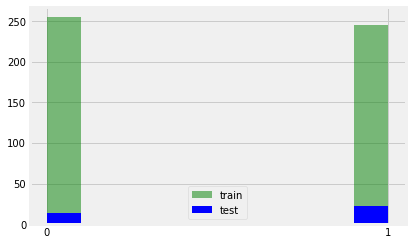

In [22]:
plt.hist(train_y , label = 'train' , color='green' , alpha=0.5)
plt.hist(test_y , label="test" , color='blue',)
plt.legend()
plt.xticks(ticks=[0,1])
plt.show()

# Deep Learning Starts

In [23]:
import torch.nn as nn
import torch
from torch.nn import functional as F

In [24]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
168,3,122,78,0,0,23.0,0.254,40,0
301,0,131,0,0,0,43.2,0.270,26,1
244,4,116,72,12,87,22.1,0.463,37,0
523,1,102,74,0,0,39.5,0.293,42,1
221,12,88,74,40,54,35.3,0.378,48,0
...,...,...,...,...,...,...,...,...,...
156,2,90,80,14,55,24.4,0.249,24,0
310,7,160,54,32,175,30.5,0.588,39,1
239,1,125,70,24,110,24.3,0.221,25,0
46,2,112,66,22,0,25.0,0.307,24,0


In [25]:
train_x = torch.from_numpy(np.array(train_x))
train_x = train_x.float()

In [26]:
train_y = torch.from_numpy(np.array(train_y))

In [27]:
len(train_x) , len(train_y)

(500, 500)

In [28]:
train_x[0]

tensor([  3.0000, 122.0000,  78.0000,   0.0000,   0.0000,  23.0000,   0.2540,
         40.0000])

In [29]:
test_x = torch.from_numpy(np.array(test_x))
test_x = test_x.float()

In [30]:
test_x = torch.from_numpy(np.array(test_x))
test_x = test_x.float()
test_y = torch.from_numpy(np.array(test_y))

# Building Network


In [32]:
class Net(nn.Module):
    def __init__(self ):
        super().__init__()
        self.input = nn.Linear(8 , 16)
        self.relu = nn.ReLU()
        self.h1 = nn.Linear(16 , 142)
        self.h2 = nn.Linear(142 , 72)
        self.h3 = nn.Linear(72 , 204)
        self.h4 = nn.Linear(204 , 32)
        self.out = nn.Linear(32,2)
        
    def forward(self , x):
        x = self.input(x)
        x = self.relu(x)
        x = self.h1(x)
        x = self.relu(x)
        x = self.h2(x)
        x = self.relu(x)
        x = self.h3(x)
        x = self.relu(x)
        x = self.h4(x)
        x = self.relu(x)
        x = self.out(x)
        
        return x

In [33]:
from tqdm import tqdm

In [34]:
model = Net()
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters() , lr=0.001)

In [35]:
model

Net(
  (input): Linear(in_features=8, out_features=16, bias=True)
  (relu): ReLU()
  (h1): Linear(in_features=16, out_features=142, bias=True)
  (h2): Linear(in_features=142, out_features=72, bias=True)
  (h3): Linear(in_features=72, out_features=204, bias=True)
  (h4): Linear(in_features=204, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=2, bias=True)
)

# Training Network

100%|██████████| 100/100 [00:00<00:00, 272.49it/s]


Text(0, 0.5, 'Loss Value')

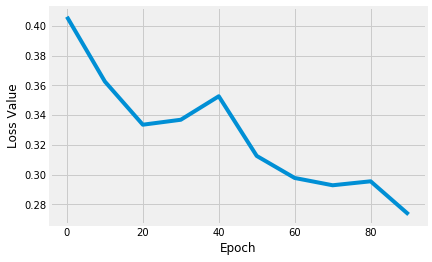

In [70]:
epochs = 100
evey = 10
loss_vals = []
plt_x = []

for epoch in tqdm(range(epochs)):
    
    y = model(train_x)
    loss = criterion(y , train_y)    
    
    if epoch % evey ==0 :
#         print( f"Epoch:{epoch}  , Loss:{loss.squeeze_()}")
        
        loss_vals.append(loss.data.item())
        plt_x.append(epoch)
    
    loss.backward()
    optim.step()
    model.zero_grad()
    
plt.plot(plt_x , loss_vals , label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")

# Testing

In [71]:
correct = 0
total =0

for i in range(len(test_x)):    
    predict= model.forward(test_x[i])
    if torch.max(predict , 0)[1] == test_y[i]:
        correct +=1
    total+=1
print(correct/total)

0.7297297297297297


# Custom testing with random sample

In [75]:
total = 20
correct = 0
for i in range(total):
    val = np.random.randint(low=0 , high=len(test_x))
    vals = model.forward(test_x[val])
    if torch.max( vals, 0)[1] == test_y[val]:
        correct +=1
    else:
        print(vals , test_y[val])
        
correct  , total

tensor([-0.7162,  0.8031], grad_fn=<AddBackward0>) tensor(0)
tensor([ 1.9698, -2.3200], grad_fn=<AddBackward0>) tensor(1)
tensor([ 1.0667, -1.5235], grad_fn=<AddBackward0>) tensor(1)
tensor([-0.7851,  0.4942], grad_fn=<AddBackward0>) tensor(0)
tensor([-0.1679, -0.3493], grad_fn=<AddBackward0>) tensor(1)
tensor([0.1125, 0.0788], grad_fn=<AddBackward0>) tensor(1)


(14, 20)